In [2]:
import numpy as np
import pandas as pd
import matplotlib as plot
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("clean_df.csv")
df

,Title,Platforms,Publisher,Genre,Total_Sales,USA_Sales,EUR_Sales,Japan_Sales,Rating,Release_date,Year
0,Grand Theft Auto: San Andreas,PS2,Rockstar Games,Action,20.8,9.43,0.40,0.41,9.8,26-Oct-04,2004.0
1,Grand Theft Auto V,PS4,Rockstar Games,Action,19.4,6.06,9.71,0.60,10.0,18-Nov-14,2014.0
2,Grand Theft Auto V,X360,Rockstar Games,Action,15.9,9.06,5.33,0.06,9.4,17-Sep-13,2013.0
3,Grand Theft Auto IV Read the review,X360,Rockstar Games,Action,11.1,6.80,3.11,0.14,8.6,29-Apr-08,2008.0
4,Uncharted 4: A Thief's End,PS4,Sony Interactive Entertainment,Action,10.3,4.49,3.93,0.21,9.8,10-May-16,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
3279,Sid Meier's Civilization Revolution Read th...,PS3,2K Games,Strategy,0.8,0.49,0.19,0.01,3.9,8-Jul-08,2008.0
3280,Yu-Gi-Oh! The Falsebound Kingdom,GC,Konami,Strategy,0.7,0.49,0.13,0.07,2.6,4-Nov-03,2003.0
3281,Fire Emblem: Shadow Dragon Read the review,DS,Nintendo,Strategy,0.6,0.29,0.03,0.27,3.4,16-Feb-09,2009.0
3282,New Play Control! Pikmin 2,Wii,Nintendo,Strategy,0.6,0.11,0.13,0.34,2.5,10-Jun-12,2012.0


### Correlation between gener and total sales


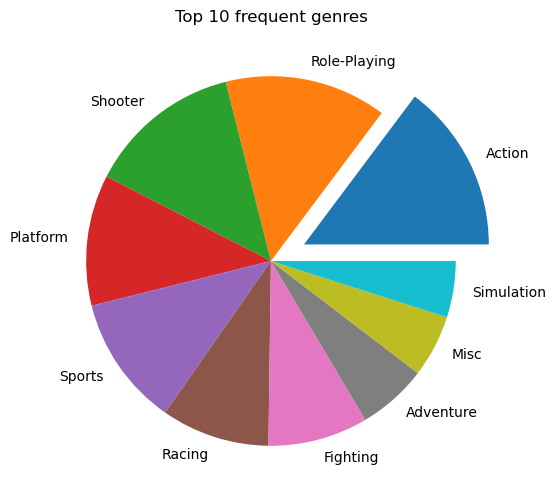

In [11]:
counts = df['Genre'].value_counts()
fig, ax = plt.subplots(figsize=(12,6))
top_10 = counts[:10] # here we get the most frequent genres in the data set
top_Generes=list(top_10.keys())
plt.title("Top 10 frequent genres");
myexplode = [0.2, 0, 0, 0,0,0,0,0,0,0]
plt.pie(top_10.values,labels =top_Generes,explode=myexplode)
plt.show() 


In [12]:
games_2008 = df.query('Year>=2008').reset_index(drop=True)
top_games = games_2008.pivot_table(index='Genre',columns='Year'
                        ,values='Total_Sales',aggfunc='sum').copy()

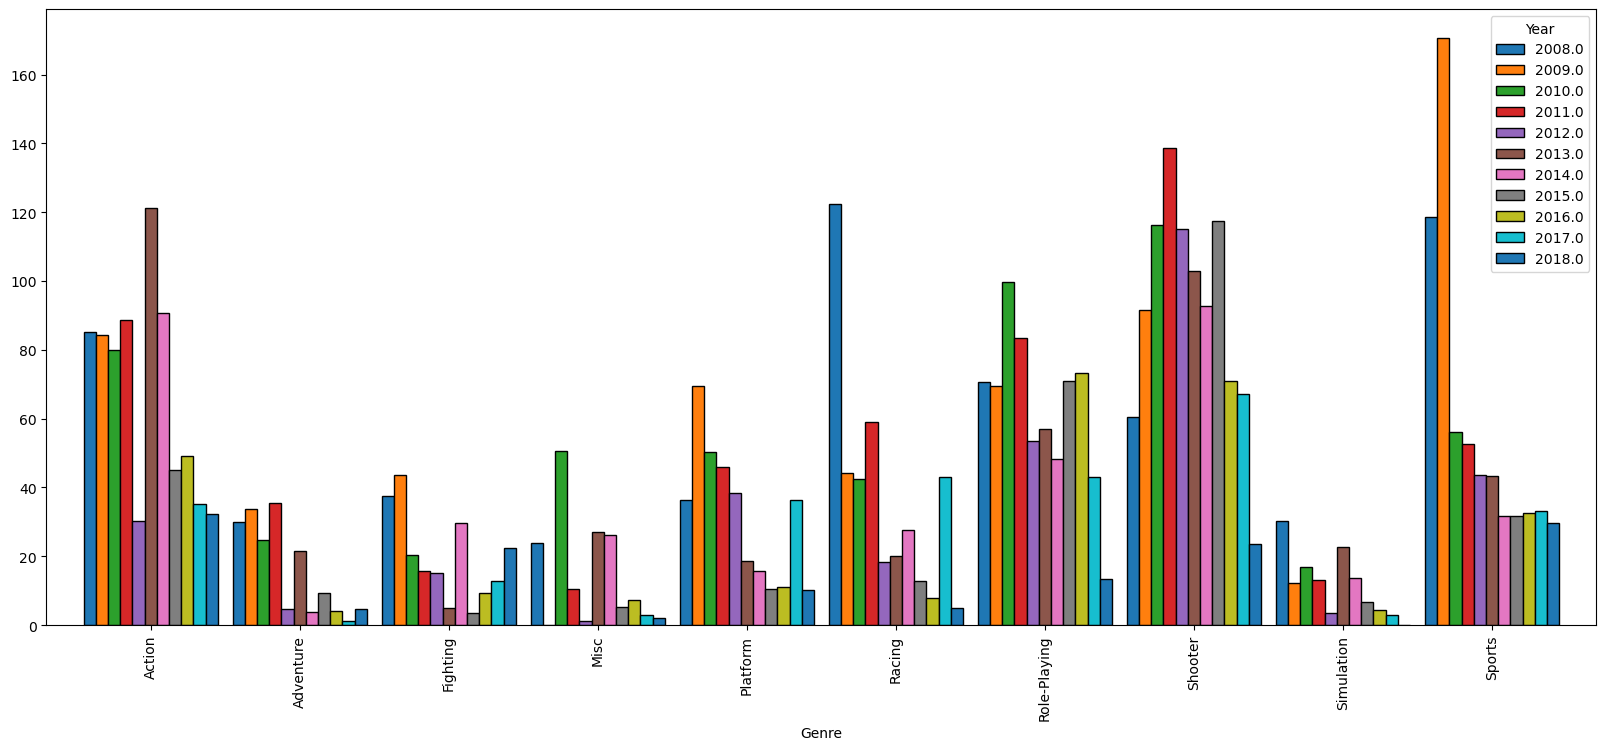

In [13]:
top_games.query('Genre in @top_Generes').plot(kind='bar', figsize=(20,8), edgecolor='black',width=0.9)
plt.title('')
plt.show()

## Correlation Between Rating And Total Sales

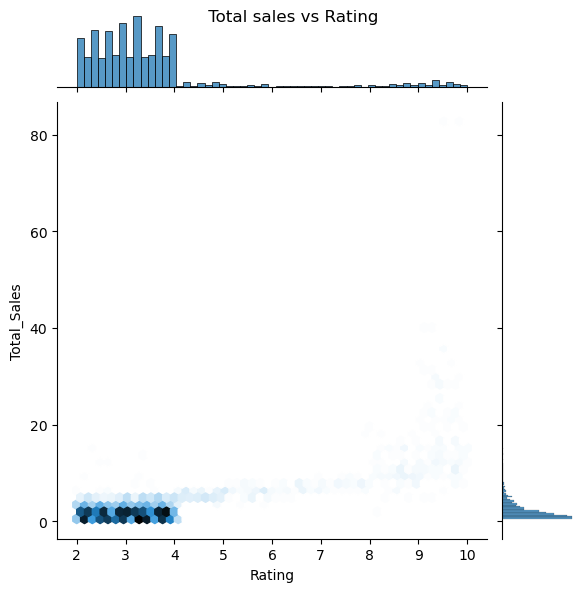

In [7]:
s = sns.jointplot(x='Rating', y='Total_Sales', data=df, kind='hex', );
s.ax_joint.grid(False);
s.ax_marg_y.grid(False);
s.fig.suptitle(" Total sales vs Rating");

## Correlation Between Rating And Total Sales

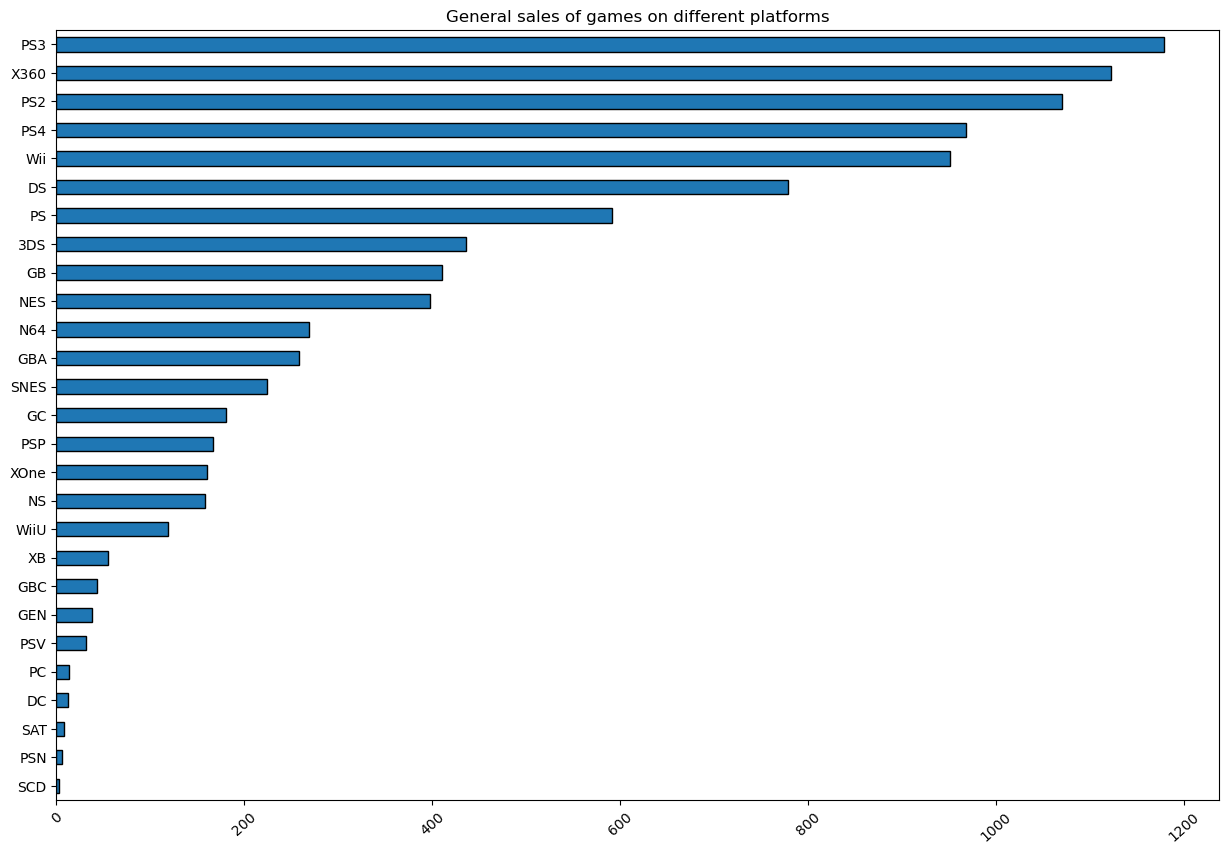

In [14]:
df.groupby('Platforms')['Total_Sales'].sum().sort_values(ascending=True).plot(
 kind='barh', y='Total_Sales', figsize=(15,10), edgecolor='black')#here we show the general sales of games in diffrent platforms
plt.title('General sales of games on different platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [15]:
lead_platforms = ['PS4','X360','PS2','PS3','Wii']
lead_games = games_2008.query('Platforms in @lead_platforms')

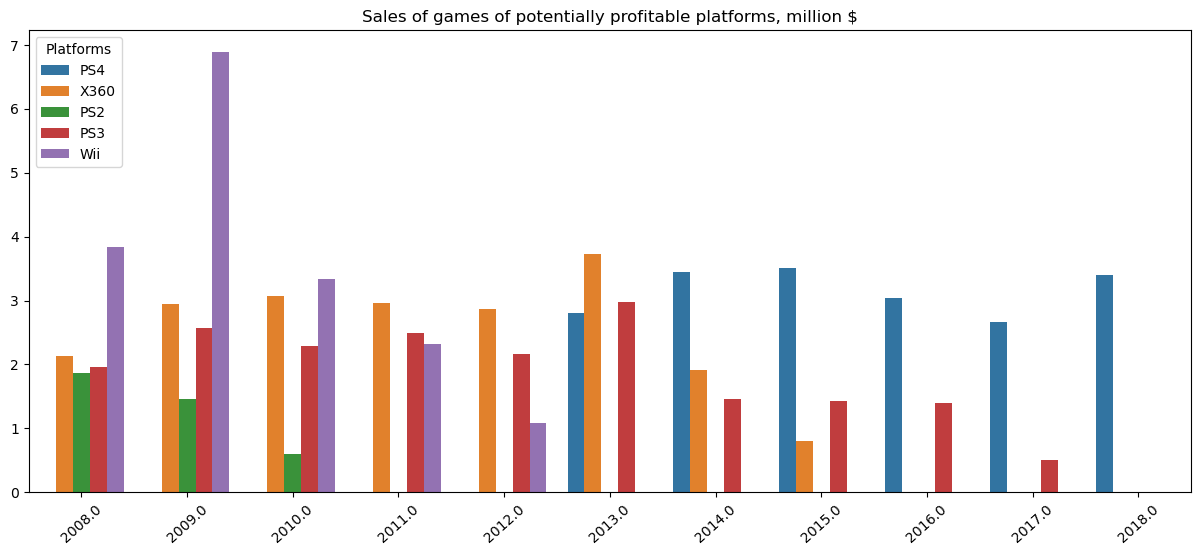

In [16]:
plt.figure(figsize=(15, 6))
sns.barplot(y='Total_Sales', 
            x='Year', 
            hue='Platforms',
            data=lead_games,
            hue_order = lead_platforms,
            ci=0
           )

plt.title('Sales of games of profitable platforms, million $')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

## Correlation Between Year Of Releases And Total Sales

In [18]:
AllGames = df.query('Year>=1985').reset_index(drop=True)

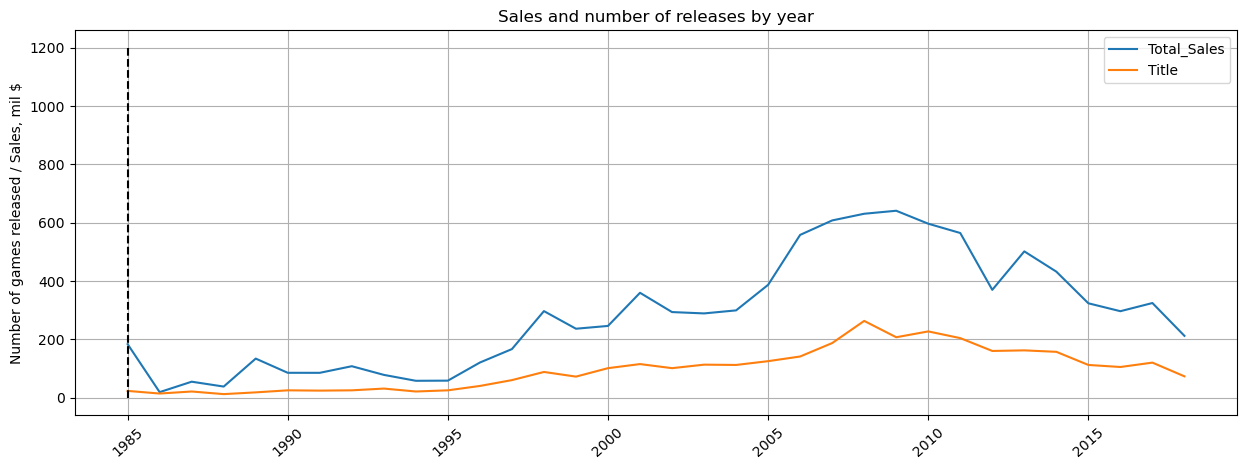

In [19]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
AllGames.groupby('Year')['Total_Sales'].sum().plot(legend=True, title='Sales and number of releases by year')
                                                                
AllGames.groupby('Year')['Title'].count().plot(legend=True, grid=True)

plt.ylabel('Number of games released / Sales, mil $')
ax.vlines(x=1985, linestyle='--', color='black', ymin=0, ymax=1200)
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

## Correlation And Impact Distributuon Of All Sales

In [20]:
def heatmap_plot(data):

    plt.figure(figsize=(15,5))
    plt.title('Heatmap Correlation and Impact Distribution of all sales')
    sns.heatmap(data[['Total_Sales', 'USA_Sales', 'EUR_Sales','Japan_Sales']].corr(), annot=True, cmap='mako', fmt='.3f' )# here we get the Correlation between sales in diffrent regions
    plt.show()

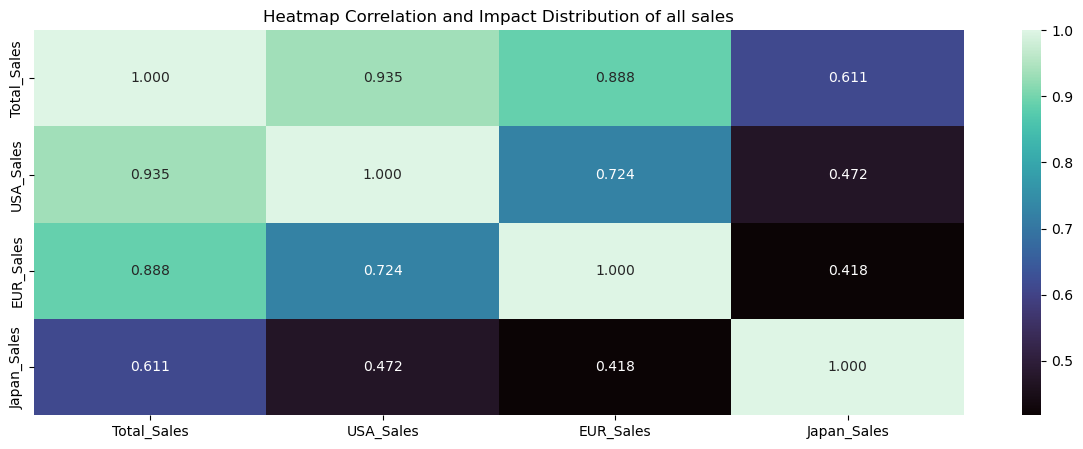

In [21]:
heatmap_plot(df)

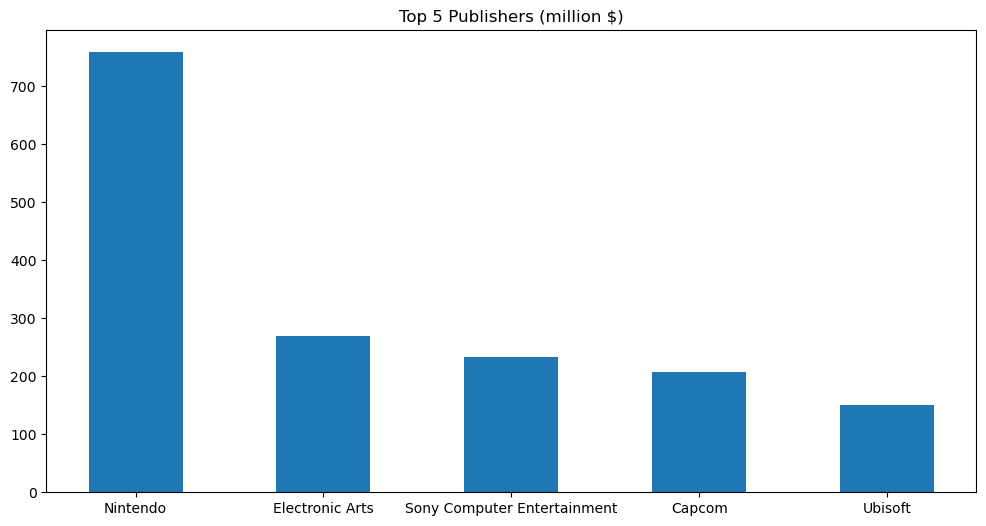

In [22]:
counts = df['Publisher'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
top_5 = counts[:5] # here we get the most frequent genres in the data set
top_Publishers=list(top_5.keys())
plt.bar(range(5), top_5.values, align='center', tick_label=top_5.keys(),width=0.5);
plt.title("Top 5 Publishers (million $)");
